In [10]:
# https://zhuanlan.zhihu.com/p/556141415
# pip install geopandas

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely import geometry
import os

plt.rcParams['font.sans-serif'] = 'Microsoft YaHei' # 设置字体为微软雅黑
# 使打印输出显示更全
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)

In [5]:
# 读取广东省geojson数据
data = gpd.read_file(r'广东省.json') 
print(data)

    adcode name  childrenNum level              parent  subFeatureIndex                                           geometry
0   440100  广州市           11  city  {'adcode': 440000}                0  MULTIPOLYGON (((113.36512 22.77259, 113.41217 ...
1   440200  韶关市           10  city  {'adcode': 440000}                1  MULTIPOLYGON (((113.80026 23.90257, 113.80732 ...
2   440300  深圳市            9  city  {'adcode': 440000}                2  MULTIPOLYGON (((114.22920 22.81253, 114.21564 ...
3   440400  珠海市            3  city  {'adcode': 440000}                3  MULTIPOLYGON (((113.26265 22.39205, 113.24947 ...
4   440500  汕头市            7  city  {'adcode': 440000}                4  MULTIPOLYGON (((116.55255 23.10589, 116.55224 ...
5   440600  佛山市            5  city  {'adcode': 440000}                5  MULTIPOLYGON (((112.97518 23.46362, 112.96629 ...
6   440700  江门市            7  city  {'adcode': 440000}                6  MULTIPOLYGON (((112.16543 22.38502, 112.15401 ...
7   440800  湛江市 

In [21]:
data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
prd_city = ['广州市','佛山市','肇庆市',
            '深圳市','东莞市','惠州市',
            '珠海市','中山市','江门市']
prd_city_english = ['guangzhou','foshan','zhaoqing',
                    'shenzhen','dongguan','huizhou',
                    'zhuhai','zhongshan','jiangmen']
prd = data[data['name'].isin(prd_city)]
# 将列重命名缩短，防止保存为shp文件时因列名过程导致的警告
prd = prd.rename(columns = {'childrenNum':'childnum','subFeatureIndex':'rawIndex'}) 
print(prd)

    adcode name  childnum level              parent  rawIndex                                           geometry
0   440100  广州市        11  city  {'adcode': 440000}         0  MULTIPOLYGON (((113.36512 22.77259, 113.41217 ...
2   440300  深圳市         9  city  {'adcode': 440000}         2  MULTIPOLYGON (((114.22920 22.81253, 114.21564 ...
3   440400  珠海市         3  city  {'adcode': 440000}         3  MULTIPOLYGON (((113.26265 22.39205, 113.24947 ...
5   440600  佛山市         5  city  {'adcode': 440000}         5  MULTIPOLYGON (((112.97518 23.46362, 112.96629 ...
6   440700  江门市         7  city  {'adcode': 440000}         6  MULTIPOLYGON (((112.16543 22.38502, 112.15401 ...
9   441200  肇庆市         8  city  {'adcode': 440000}         9  MULTIPOLYGON (((112.83049 23.54576, 112.80214 ...
10  441300  惠州市         5  city  {'adcode': 440000}        10  MULTIPOLYGON (((114.51445 22.66075, 114.53223 ...
16  441900  东莞市         0  city  {'adcode': 440000}        16  MULTIPOLYGON (((114.22920 22.8125

In [7]:
# 创建一个储存shp文件的文件夹
if not os.path.exists('PRD'):
    os.mkdir('PRD')
# 保存为shp文件
prd.to_file('PRD/PRD.shp',
             driver='ESRI Shapefile',
             encoding='utf-8')

In [16]:
prd[prd['name']=='广州市'].representative_point()

0    POINT (113.53666 23.22873)
dtype: geometry

findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following fa

<Axes: >

findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following fa

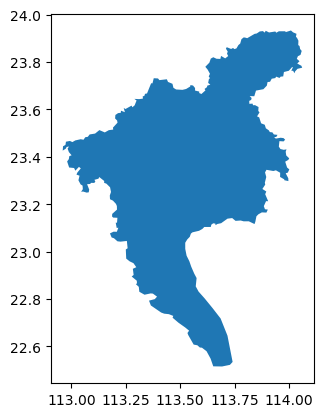

In [26]:
prd[prd['name']=='广州市']['geometry'].plot()

In [17]:
prd.representative_point().x,prd.representative_point().y

(0     113.536657
 2     114.187166
 3     113.317227
 5     113.004074
 6     112.615057
 9     112.144469
 10    114.341505
 16    113.914481
 17    113.452609
 dtype: float64,
 0     23.228727
 2     22.648786
 3     22.164098
 5     23.105308
 6     22.275467
 9     23.580188
 10    23.251803
 16    22.893982
 17    22.488786
 dtype: float64)

C:\Users\Admin\AppData\Local\Temp\ipykernel_48236\497127803.py:23: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(frameon=False)


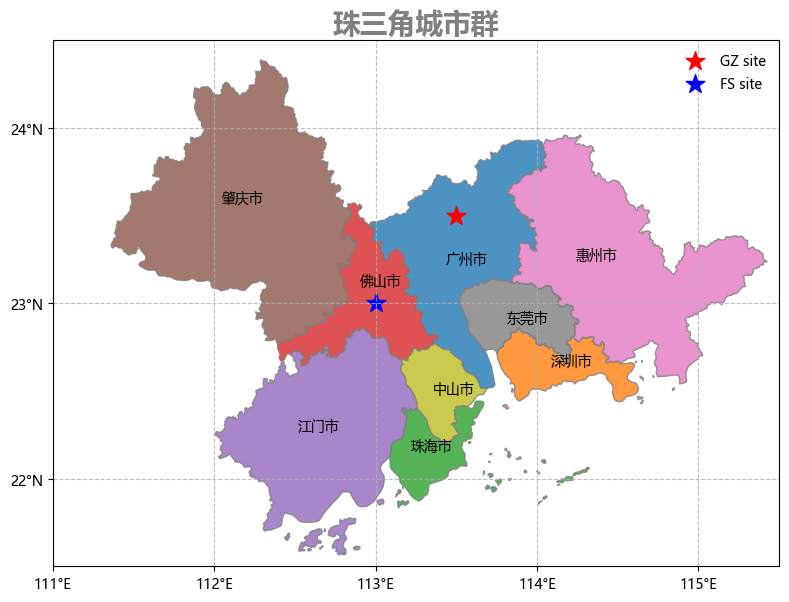

In [9]:
# 绘制地图
fig,ax = plt.subplots(figsize=(8,6))
colors =  ['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9']
p = prd.plot(ax=ax,color=colors,scheme="quantiles",edgecolor='grey',alpha=0.8,label=prd_city)
# 设置经纬度范围
ax.set_ylim(21.5,24.5)
ax.set_xlim(111,115.5)
# 设置轴标签为经纬度
ax.set_xticks(range(111,116,1),[str(x)+'°E' for x in range(111,116,1)])
ax.set_yticks(range(22,25,1),[str(x)+'°N' for x in range(22,25,1)])
# 给每块地图区域添加城市名称
for x, y, label in zip(prd.representative_point().x, prd.representative_point().y, prd['name']):
    ax.text(x-0.1, y, label, fontsize=10)

# 根据研究站点的经纬度，将其添加到地图上
GZ = gpd.GeoSeries([geometry.Point([113.5, 23.5])],crs='EPSG:4326')
FS = gpd.GeoSeries([geometry.Point([113, 23])],crs='EPSG:4326')
GZ.plot(ax=ax,marker='*',color='r',markersize=200,label='GZ site')
FS.plot(ax=ax,marker='*',color='b',markersize=200,label='FS site')

#设置网格线图例和标题
ax.grid(ls='--',alpha=0.8)
ax.legend(frameon=False)
ax.set_title('珠三角城市群',color='grey',fontsize=20,fontweight='bold')

# 保存输出图形
plt.tight_layout()
plt.savefig('PRD/珠三角城市群.png',dpi=600)
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following fa

<Axes: >

findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following fa

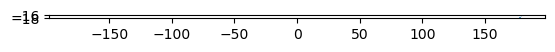

In [38]:
world[world['name']=='Fiji']['geometry'].plot()


findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following fa

<Axes: >

findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following fa

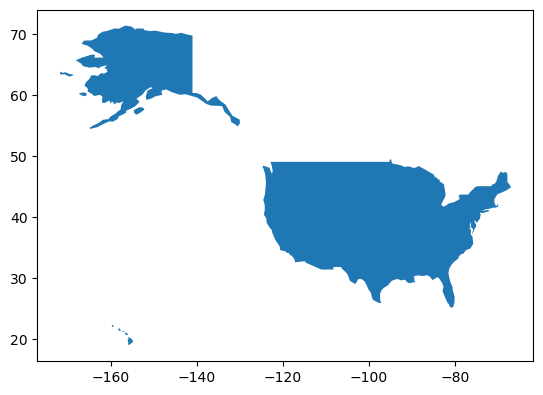

In [39]:
world[world['name']=='United States of America'].plot()


In [29]:
world[world['continent']=='Fiji'].plot()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


/var/folders/q2/74vp1g0x6gz96k_qr9vcsdp80000gn/T/ipykernel_56878/298073847.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not 

<Axes: >

findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following fa

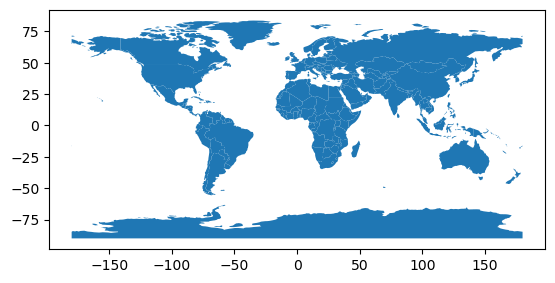

In [28]:

import pandas as pd
import geopandas
import matplotlib.pyplot as plt
%matplotlib inline

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.plot()


In [ ]:
geopandas.read_file(geopandas.datasets.get_path('l'))

In [1]:
pip install transbigdata

  Obtaining dependency information for transbigdata from https://files.pythonhosted.org/packages/c4/5d/e63e8804540f4b2b6a9036a4001b2ef9d386bc1ade2a89377bbbf950174c/transbigdata-0.5.2-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 5.1 MB/s eta 0:00:0000:0100:01
  Obtaining dependency information for geopandas>=0.10.2 from https://files.pythonhosted.org/packages/27/27/2687abaa2ac02b5814e2929a5033da1e5d132c19a904dc56f77f63fd6eb9/geopandas-0.14.0-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.9/228.9 kB 17.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for osmnx from https://files.pythonhosted.org/packages/3e/3f/9b8c9a5a54247a4d002f5f05fae9bf2cb3ae6e4e7a15f15acef41991cf17/osmnx-1.6.0-py3-none-any.whl.metadata
  Obtaining dependency information for fiona>=1.8.21 from https://files.pythonhosted.org/packages/b1/dc/a1b2e2dc1278bc2cbdfd5a041a4882c6403e54adaebd95e76f3be4367703/Fiona-1.9

Note: you may need to restart the kernel to use updated packages.


In [2]:
import transbigdata as tbd
tbd.visualization_trip(taxidata)


NameError: name 'taxidata' is not defined